In [79]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [14]:
winners = pd.read_excel("draw_winners.xlsx", header = None)
wins = winners.iloc[:, 0]

In [42]:
freq = [0]*46

for i in range(1133):
    draw = winners.iloc[i,:]
    weight = draw[0]
    num = draw[1:7]
    for n in num:
        freq[n] += weight     

freq = np.array(freq[1:])      

In [70]:
def chisq(table):
      # expected 값은 table 내의 모든 값의 합을 table의 행 개수로 나눈 값
      # expected = table.sum() / table.shape[0]
      expected = 1201
      # chisq 계산
      return ((table - expected) ** 2 / expected).sum()



In [71]:
N = 45;k = 6
print("각 숫자에 대한 점근적 검정 p-value:", stats.chi2.sf(chisq(freq)*(N-1)/(N-k), N-1))


각 숫자에 대한 점근적 검정 p-value: 1.2077637891715076e-96


In [72]:
a = list(enumerate(freq))
a.sort(key = lambda x : x[1])
a[:10]

[(24, 985),
 (22, 1010),
 (8, 1012),
 (21, 1027),
 (40, 1038),
 (41, 1063),
 (28, 1081),
 (29, 1082),
 (31, 1091),
 (1, 1101)]

In [138]:
freqdata = pd.DataFrame(freq, index = range(1,46)).reset_index()

freqdata.columns = ['num', 'freq']


In [140]:
freqdata

,num,freq
0,1,1299
1,2,1101
2,3,1218
3,4,1227
4,5,1194
5,6,1263
6,7,1340
7,8,1167
8,9,1012
9,10,1245


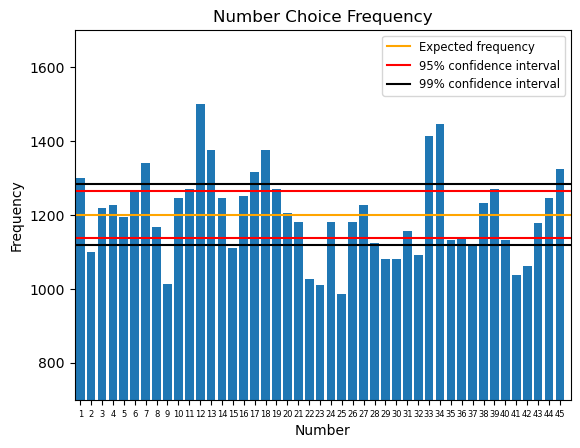

In [146]:
plt.bar(freqdata.num, freqdata.freq)
plt.axhline(1201, color = 'orange', label = 'Expected frequency')
plt.axhline(1264.23, color = 'red', label = '95% confidence interval')
plt.axhline(1137.77, color = 'red')
plt.axhline(1284.1, color = 'black', label = '99% confidence interval')
plt.axhline(1117.9, color = 'black')
plt.xlim(0.5,46)
plt.ylim(700,1700)
plt.xticks(list(range(1,46)), fontsize=6) 
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.title("Number Choice Frequency")
plt.legend(fontsize = 'small', loc = 'upper right')



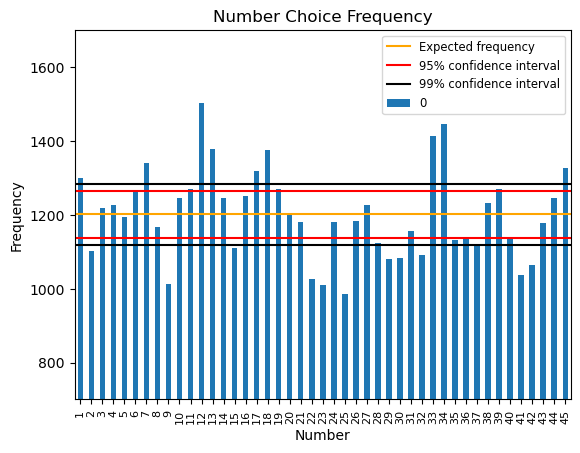